#### SBTi Dataset codes - NET ZERO PLEDGES OVER TIME 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Company Name                       4382 non-null   object
 1   ISIN                               1963 non-null   object
 2   LEI                                2438 non-null   object
 3   Near term - Target Status          4382 non-null   object
 4   Near term - Target Classification  2143 non-null   object
 5   Near term - Target Year            2095 non-null   object
 6   Long term - Target Status          135 non-null    object
 7   Long term - Target Classification  140 non-null    object
 8   Long term - Target Year            139 non-null    object
 9   Net-Zero Committed                 4382 non-null   object
 10  Net-Zero Year                      134 non-null    object
 11  Organization Type                  4382 non-null   object
 12  BA1.5 

/Users/kayleedekker/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


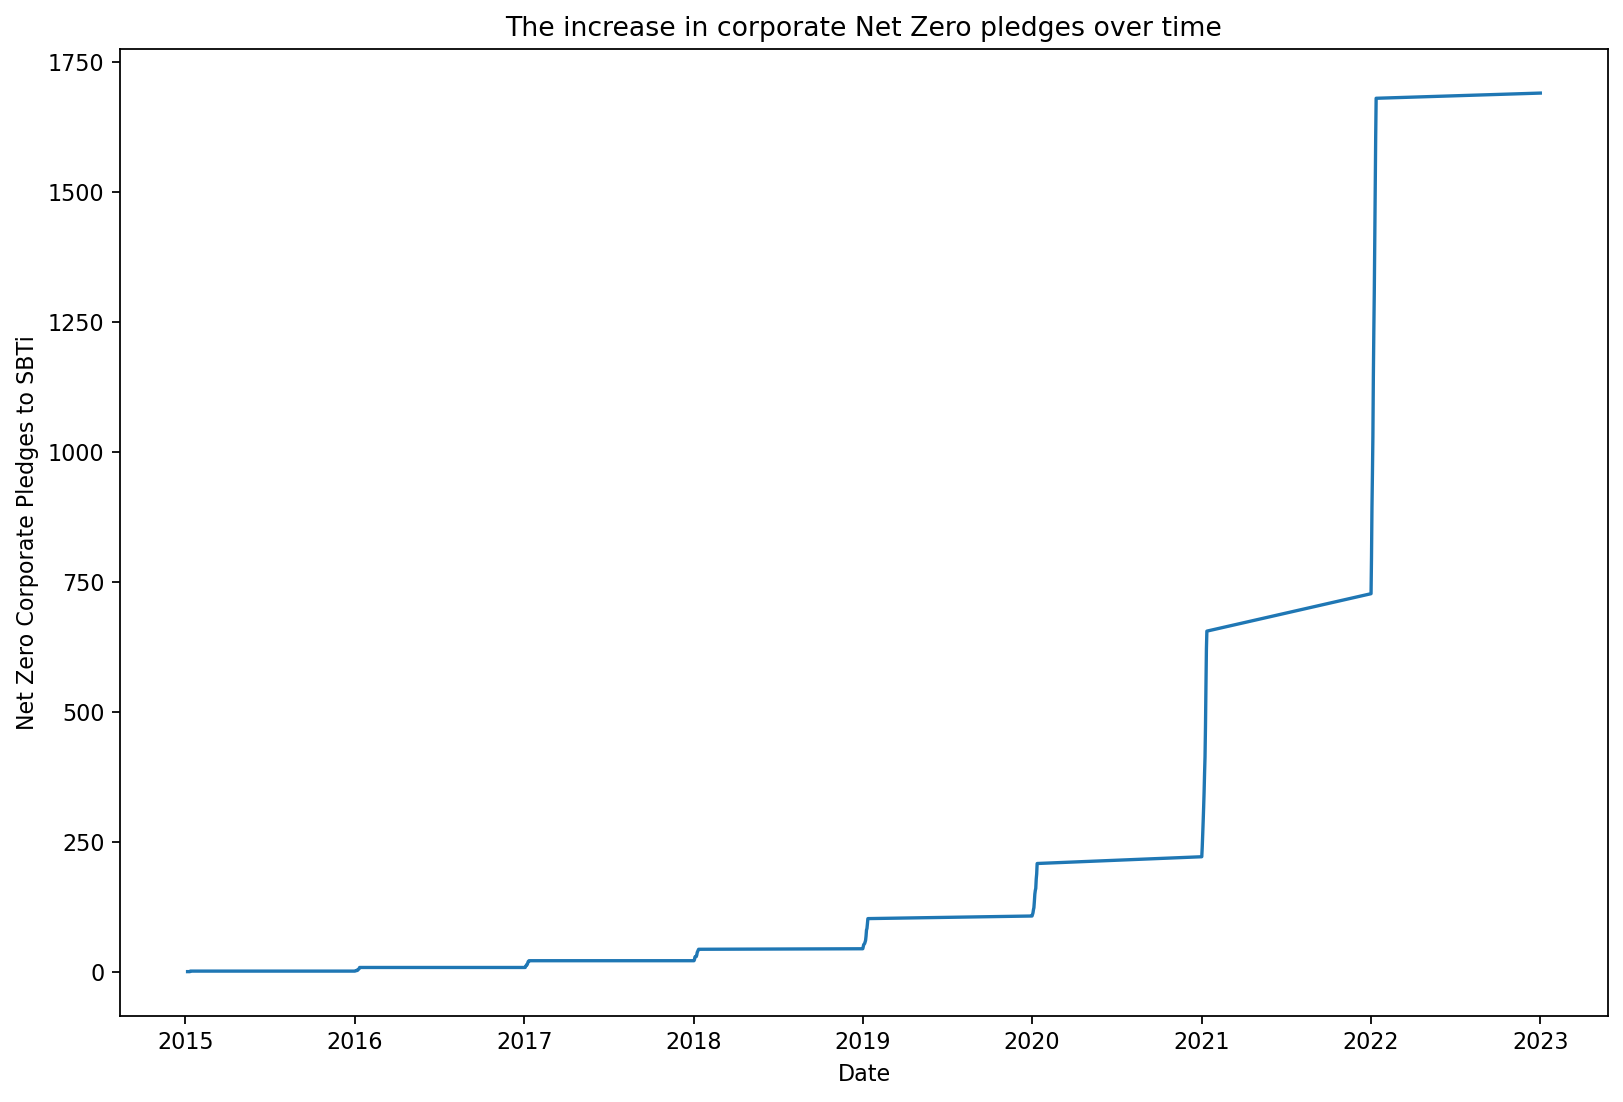

In [4]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import datetime
from matplotlib.pyplot import figure

# Import the data set 
# Load orginal dataset again 
data = pd.read_csv("SBTi_company_data.csv")

# Visualise first 5 rows of dataset 
data.head()

# Get info on the dataset 
data.info()

# Get the percentage of missing data values in each column 
(data.isnull().sum()*100/len(data)).sort_values(ascending = False)


### DATA CLEANING 

# Select a subset of columns 
selected_cols = data[['Date','Company Name', 'Long term - Target Status', 'Long term - Target Year', 
                      'Near term - Target Status', 'Near term - Target Year', 'Location',
                      'Region', 'Sector', 'Net-Zero Committed']]


# Create the function to get the necessary data set 
def demand_function_df(df):
    
    # Isolate the relevant columns 
    cols = df[['Date','Net-Zero Committed', 'Region']]
    
    # Convert to dataframe 
    df_cols = pd.DataFrame(cols)
    
    # Change Yes and No to 1 and 0
    df_cols['Net-Zero Committed'] = df_cols['Net-Zero Committed'].map({'Yes': 1, 'No': 0})
    
    # Convert object type to datetime object
    df_cols['Date'] = pd.to_datetime(df_cols['Date'])
    
    # Group by unique date values and reset index 
    df_cols = df_cols.groupby([df_cols['Date'].dt.date]).sum().reset_index() 
    
    # Create a new column that find the cumulative net zero pledges 
    df_cols['Net-Zero Committed count'] = df_cols['Net-Zero Committed'].cumsum()
    
    return df_cols

# Export the dataframe 
export_df = demand_function_df(data)
export_df


### GRAPH 
def demand_function(df):
    
    # Isolate the relevant columns 
    cols = df[['Date','Net-Zero Committed', 'Region']]
    
    # Convert to dataframe 
    df_cols = pd.DataFrame(cols)
    
    # Change Yes and No to 1 and 0
    df_cols['Net-Zero Committed'] = df_cols['Net-Zero Committed'].map({'Yes': 1, 'No': 0})
    
    # Convert object type to datetime object
    df_cols['Date'] = pd.to_datetime(df_cols['Date'])
    
    # Group by unique date values and reset index 
    df_cols = df_cols.groupby([df_cols['Date'].dt.date]).sum().reset_index() 
    
    # Create a new column that find the cumulative net zero pledges 
    df_cols['Net-Zero Committed count'] = df_cols['Net-Zero Committed'].cumsum()
    
    # Create the plot
    x = df_cols['Date']
    y = df_cols['Net-Zero Committed count']

    figure(figsize=(12, 8), dpi=80)
    plot = plt.plot(x, y)

    # Providing x and y label to the chart
    plt.xlabel('Date')
    plt.ylabel('Net Zero Corporate Pledges to SBTi')
    plt.title('The increase in corporate Net Zero pledges over time')
    
    set_matplotlib_formats('retina', quality=100)
    
    return plot 


# Run function 
demand_function(data)